In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_excel('/private/wuchenpeng/projects/high-molecular/data/1_聚合反应更新数据.xlsx')
data.columns = data.iloc[0]
data = data.drop(0)

In [3]:
data

,redox,azo,fe,ybc,温度,浓度,AMPS,[n],转化率（%）
1,0,0,0,0,0,15,10,0,0
2,0.0001,0.0001,0.5,0.0001,5,15,10,0,0
3,0.001,0.001,1,0.001,10,15,10,1120,71
4,0.01,0.01,1.5,0.01,15,15,10,1385,80
5,0.1,0.1,2,0.1,20,15,10,240,100
...,...,...,...,...,...,...,...,...,...
173,0.001,0.004,1,0,5,25,50,1925.3,96.8
174,0.001,0.003,1,0,5,25,50,1902,96.3
175,0.001,0.004,2,0,5,25,75,1705,98.2
176,0.001,0.004,2,0,5,25,100,1386,99.9


In [4]:
data = data.astype('float64')

In [5]:
columns_to_transform = ['redox', 'azo', 'ybc']

In [6]:
epsilon = 1e-5
data[columns_to_transform] = data[columns_to_transform].applymap(lambda x: np.abs(np.log10(x + epsilon)))

In [7]:
data

,redox,azo,fe,ybc,温度,浓度,AMPS,[n],转化率（%）
1,5.000000,5.000000,0.0,5.000000,0.0,15.0,10.0,0.0,0.0
2,3.958607,3.958607,0.5,3.958607,5.0,15.0,10.0,0.0,0.0
3,2.995679,2.995679,1.0,2.995679,10.0,15.0,10.0,1120.0,71.0
4,1.999566,1.999566,1.5,1.999566,15.0,15.0,10.0,1385.0,80.0
5,0.999957,0.999957,2.0,0.999957,20.0,15.0,10.0,240.0,100.0
...,...,...,...,...,...,...,...,...,...
173,2.995679,2.396856,1.0,5.000000,5.0,25.0,50.0,1925.3,96.8
174,2.995679,2.521434,1.0,5.000000,5.0,25.0,50.0,1902.0,96.3
175,2.995679,2.396856,2.0,5.000000,5.0,25.0,75.0,1705.0,98.2
176,2.995679,2.396856,2.0,5.000000,5.0,25.0,100.0,1386.0,99.9


In [8]:
columns_to_normalize = ['redox', 'azo', 'fe', 'ybc', '温度', '浓度', 'AMPS', '[n]', '转化率（%）']
data_to_normalize = data[columns_to_normalize]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_to_normalize)

In [10]:
data[columns_to_normalize] = pd.DataFrame(normalized_data, columns=columns_to_normalize)

In [11]:
data

,redox,azo,fe,ybc,温度,浓度,AMPS,[n],转化率（%）
1,0.879620,0.823922,-0.699286,0.525044,-0.617757,-1.562491,-1.263118,-1.321379,-2.096500
2,0.114425,0.075557,-0.249200,-0.133108,0.131168,-1.562491,-1.263118,-0.002494,-0.111940
3,-0.677139,-0.698598,0.200886,-0.813942,0.880093,-1.562491,-1.263118,0.309564,0.139623
4,-1.471483,-1.475471,0.650972,-1.497165,1.629018,-1.562491,-1.263118,-1.038760,0.698654
5,1.707167,-0.698598,0.650972,0.525044,0.131168,-0.781246,-1.263118,-0.229766,-0.097965
...,...,...,...,...,...,...,...,...,...
173,0.114425,-0.293015,-0.249200,1.236826,-0.617757,0.000000,1.105855,0.918371,0.595234
174,0.114425,-0.389834,0.650972,1.236826,-0.617757,0.000000,2.586463,0.686388,0.648342
175,0.114425,-0.389834,0.650972,1.236826,-0.617757,0.000000,4.067072,0.310742,0.695859
176,0.114425,-0.389834,0.650972,1.236826,-0.617757,0.000000,0.513612,1.226896,0.536535


In [12]:
data = data.drop(data.index[-1])

In [13]:
data

,redox,azo,fe,ybc,温度,浓度,AMPS,[n],转化率（%）
1,0.879620,0.823922,-0.699286,0.525044,-0.617757,-1.562491,-1.263118,-1.321379,-2.096500
2,0.114425,0.075557,-0.249200,-0.133108,0.131168,-1.562491,-1.263118,-0.002494,-0.111940
3,-0.677139,-0.698598,0.200886,-0.813942,0.880093,-1.562491,-1.263118,0.309564,0.139623
4,-1.471483,-1.475471,0.650972,-1.497165,1.629018,-1.562491,-1.263118,-1.038760,0.698654
5,1.707167,-0.698598,0.650972,0.525044,0.131168,-0.781246,-1.263118,-0.229766,-0.097965
...,...,...,...,...,...,...,...,...,...
172,0.114425,-0.389834,-0.249200,1.236826,-0.617757,0.000000,1.105855,0.945808,0.609209
173,0.114425,-0.293015,-0.249200,1.236826,-0.617757,0.000000,1.105855,0.918371,0.595234
174,0.114425,-0.389834,0.650972,1.236826,-0.617757,0.000000,2.586463,0.686388,0.648342
175,0.114425,-0.389834,0.650972,1.236826,-0.617757,0.000000,4.067072,0.310742,0.695859


PCA

In [14]:
columns_to_combine = ['redox', 'azo', 'fe', 'ybc', '温度', '浓度', 'AMPS']
columns_to_combine1 = ['redox', 'azo', 'ybc']
columns_to_combine2 = ['fe', '温度', '浓度', 'AMPS']

In [15]:
pca = PCA(n_components=1)
data['combined_feature'] = pca.fit_transform(data[columns_to_combine])
data['combined_feature1'] = pca.fit_transform(data[columns_to_combine1])
data['combined_feature2'] = pca.fit_transform(data[columns_to_combine2])

In [16]:
data

,redox,azo,fe,ybc,温度,浓度,AMPS,[n],转化率（%）,combined_feature,combined_feature1,combined_feature2
1,0.879620,0.823922,-0.699286,0.525044,-0.617757,-1.562491,-1.263118,-1.321379,-2.096500,-0.900084,-0.472893,-0.901174
2,0.114425,0.075557,-0.249200,-0.133108,0.131168,-1.562491,-1.263118,-0.002494,-0.111940,-0.967522,-0.190097,-0.983372
3,-0.677139,-0.698598,0.200886,-0.813942,0.880093,-1.562491,-1.263118,0.309564,0.139623,-1.035847,0.102445,-1.065569
4,-1.471483,-1.475471,0.650972,-1.497165,1.629018,-1.562491,-1.263118,-1.038760,0.698654,-1.104265,0.396014,-1.147767
5,1.707167,-0.698598,0.650972,0.525044,0.131168,-0.781246,-1.263118,-0.229766,-0.097965,-0.224848,0.027066,-0.424728
...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.114425,-0.389834,-0.249200,1.236826,-0.617757,0.000000,1.105855,0.945808,0.609209,1.282457,1.040563,0.813265
173,0.114425,-0.293015,-0.249200,1.236826,-0.617757,0.000000,1.105855,0.918371,0.595234,1.262473,0.986195,0.813265
174,0.114425,-0.389834,0.650972,1.236826,-0.617757,0.000000,2.586463,0.686388,0.648342,2.583433,1.040563,2.279097
175,0.114425,-0.389834,0.650972,1.236826,-0.617757,0.000000,4.067072,0.310742,0.695859,3.377463,1.040563,3.181000


In [17]:
columns_to_print2 = ['redox', 'azo', 'fe', 'ybc', '温度', '浓度', 'AMPS', '[n]', '转化率（%）', 'combined_feature', 'combined_feature1', 'combined_feature2']

/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 36716 (\N{CJK UNIFIED IDEOGRAPH-8F6C}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/

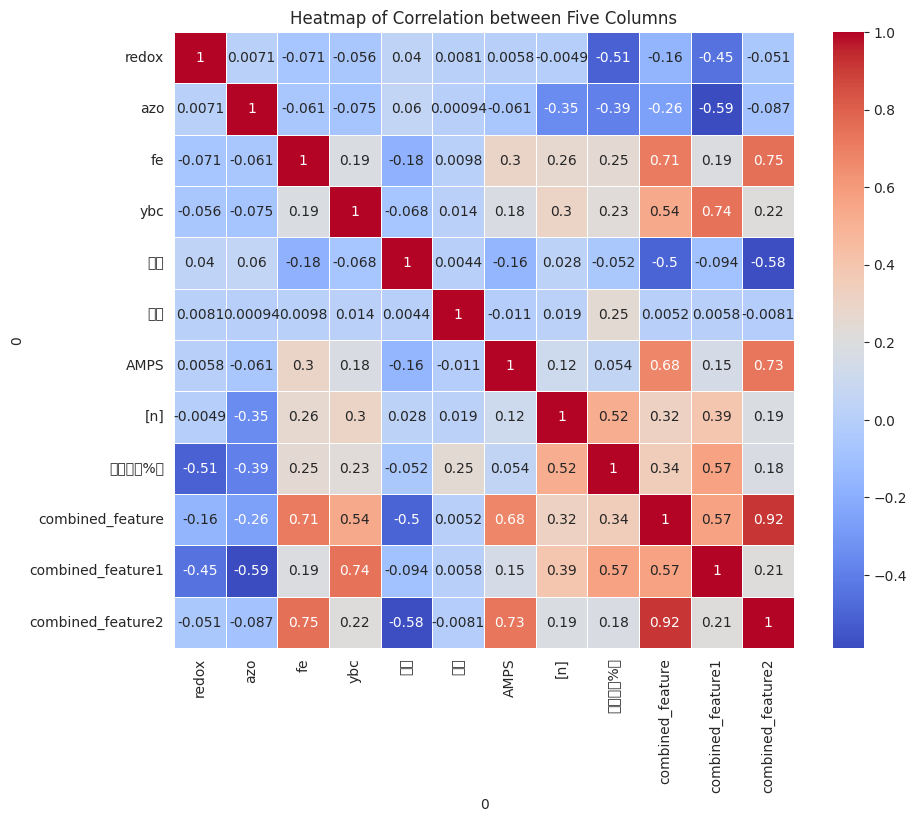

In [18]:
corr_matrix2 = data[columns_to_print2].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Correlation between Five Columns")
plt.show()

In [19]:
data.to_excel('dup_log_StandardPCA.xlsx', index=False)